# Bootstrapped Line Fitting

In this notebook, you will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data.

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

We start with a generative model:

$$
X \sim U(10,20)
$$

$$
Y \sim mX + b + N(0,\sigma^2)
$$

Here are the input parameters we are going to use for this model.

In [2]:
m = 0.75
b = 3.5
sigma = 0.5

Generate two NumPy arrays of 50 points for this model. Store these values in the arrays `X` and `Y`:

In [3]:
# YOUR CODE HERE
def model(x, m, b):
    return m * x + b

X = np.random.uniform(10.0, 20.0, 50)
Y = model(X, m, b) + np.random.normal(0, sigma, 50)

Make an appropriately labeled scatter plot of the `X` and `Y` data:

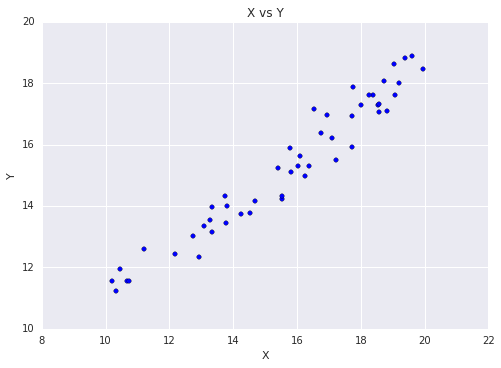

In [4]:
# YOUR CODE HERE
plt.scatter(X, Y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y');

plt.grid(True)

In [5]:
from scipy.optimize import curve_fit

Write a function `fit`, that uses `curve_fit` and returns a fitted `(slope, intercept)` for the `X` and `Y` data above.

In [6]:
def fit(X, Y):
    """Fit X and Y data to the model Y ~ m*X + b and return (m,b)"""
    # YOUR CODE HERE
    def func(x, m, b):
        return m * x + b
    
    a, b = curve_fit(func, X, Y)
    
    return a

In [7]:
m, b = fit([0,1,2], [0,1,2])
assert abs(m-1.0)<0.01
assert abs(b-0.0)<0.01

Write a function, `bootstrap`, that can create boostrapped versions of the `X` and `Y` arrays above. It is important that you bootstrap pairs of `X[i],Y[i]` to preserve correlations in the model. Remember, to bootstrap data you will draw random samples with replacement.

In [8]:
def bootstrap(X, Y):
    """Return boostrapped versions of the input X and Y arrays, perserving correlations.
    
    Parameters
    ----------
    X: ndarray
        Input X array.
    Y: ndarray
    
    Returns
    -------
    XX: ndarray
        The boostrapped X array with the same shape as X and correlated random samples
        drawn with replacement.
    YY: ndarray
        The bootstrapped Y array with the same shape as Y and correlated random samples
        drawn with replacement.
    """
    # YOUR CODE HERE
    ind = np.random.randint(0, len(X), len(Y))
    return X[ind], Y[ind]

In [9]:
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
ab, bb = bootstrap(a, b)
for element in ab:
    assert element in a
for element in bb:
    assert element in b
assert len(a)==len(ab)
assert len(ab)==len(bb)

Write a function, `bootstrap_fit`, that takes finds the slope and intercept of the input `X` and `Y` data  using the `fit` function above. Your function should perform this fit `n` times using bootstrapped data.

In [10]:
def bootstrap_fit(X, Y, n):
    """Fit a straight line to X and Y n times using bootstrapping.
    
    Returns
    -------
    (m, b): tuple of ndarrays
        A tuple of 1d arrays with the bootstrapped values of the slope and intercept.
    """
    # YOUR CODE HERE
    m = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        bootX, bootY = bootstrap(X, Y)
        m[i], b[i] = fit(bootX, bootY)
        
    return m, b

Using the original `X` and `Y` data above:

* Find the bootstrapped slopes and intercepts (bootstrap 100 times).
* Make an appropriately labeled `jointplot` of the bootstrapped slopes and intercepts.
* Find and print the 95% confidence intervals for the slope and intercept.

Slope 95% Confidence Interval: [ 0.73039059  0.80693875]
Intercetp 95% Confidence Interval: [ 2.63739804  3.92349414]


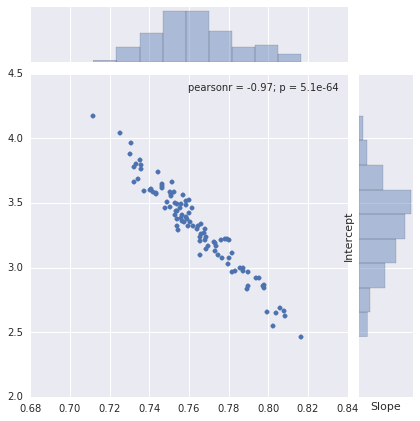

In [11]:
# YOUR CODE HERE
M, B = bootstrap_fit(X, Y, 100)
sns.jointplot(M, B)
plt.xlabel('Slope')
plt.ylabel('Intercept')

print("Slope 95% Confidence Interval:", np.percentile(M, (2.5, 97.5)))
print("Intercetp 95% Confidence Interval:", np.percentile(B, (2.5, 97.5)))